# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target
tt=pd.DataFrame(np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
tt.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

np.random.seed(5)
%matplotlib inline

設定模型評估參數

In [4]:
estimators = [('hc_ward', AgglomerativeClustering(n_clusters=3, linkage="ward")),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average"))]

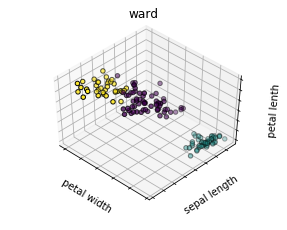

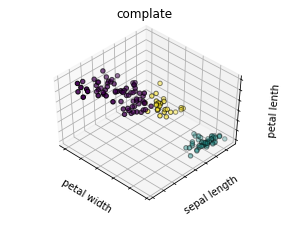

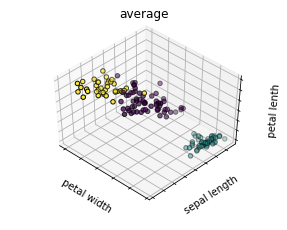

In [5]:
fignum = 1
titles = ['ward', 'complate', 'average']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('petal width')
    ax.set_ylabel('sepal length')
    ax.set_zlabel('petal lenth')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

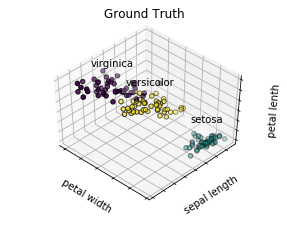

In [6]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('setosa', 0),
                    ('versicolor', 1),
                    ('virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('petal width')
ax.set_ylabel('sepal length')
ax.set_zlabel('petal lenth')
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()